<a href="https://colab.research.google.com/github/Lfahima/datasci_5_statistics/blob/main/HHA507_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt

## Chi-Square Test

In [3]:
SMH = pd.read_csv('Student Mental health.csv')
SMH

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


## Hypothesis:
Alternative/Hypothesis: There is a correlation between gender and depression status.

Null Hypothesis: There is no correlation between gender and depression status.


In [5]:
SMH['Choose your gender'].value_counts()
SMH['Do you have Depression?'].value_counts()

contingency_table = pd.crosstab(SMH['Choose your gender'], SMH['Do you have Depression?'])
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Do you have Depression?  No  Yes
Choose your gender              
Female                   46   29
Male                     20    6
Chi2 value: 1.4408896103896098
P-value: 0.22999543639902997


##Results:
Because the P-value is greater than 0.05 there is not a strong correlation between gender and depression status.

I used Chi_Square test for this hypothesis because the hypothesis required two categorical variables.

## T-Test

In [6]:
HCD = pd.read_csv('Healthcare-Diabetes.csv')
HCD

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


##Hypothesis:
Alternative Hypothesis: The average of diabetes genetic score is going to be different for people who have diabetes compared to people who do not have diabetes.

Null Hypothesis: The average of diabetes genetic score is not going to be different for people who have diabetes compared to people who do not have diabetes.

In [14]:
diabetes_data = HCD[HCD['Outcome'] == 1]['DiabetesPedigreeFunction']

In [15]:
non_diabetes_data = HCD[HCD['Outcome'] == 0]['DiabetesPedigreeFunction']

In [16]:
t_stat, p_val = ttest_ind(diabetes_data, non_diabetes_data, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

diabetes_data_mean = diabetes_data.mean()
non_diabetes_data_mean = non_diabetes_data.mean()

print(f"Mean DiabetesPedigreeFunction for people with diabetes: {diabetes_data_mean}")
print(f"Mean DiabetesPedigreeFunction for people without diabetes: {non_diabetes_data_mean}")

T-statistic: 8.01529201202996
P-value: 2.088811085124931e-15
Mean DiabetesPedigreeFunction for people with diabetes: 0.5434453781512604
Mean DiabetesPedigreeFunction for people without diabetes: 0.43331552863436124


## Results:
Because the P-value is less than 0.05 my alternative hypothesis is true.

I used T-Test for this hypothesis because the hypothesis required one numerical and one categorical variable.

## Anova

In [17]:
HCI = pd.read_csv('Healthcare_Investments-Stay.csv')
HCI

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


## Hypothesis:

Alternative Hypothesis: The average hospital stay differ across different locations.

Null Hypothesis: The average hospital stay does not differ across different locations.


In [38]:
print(HCI.isnull().sum())
print(HCI.describe())

model = ols('Hospital_Stay ~ Location * Time', data=HCI).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

HCI.groupby('Location')['Hospital_Stay'].mean()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64
              Time  Hospital_Stay   MRI_Units  CT_Scanners  Hospital_Beds
count   518.000000     518.000000  518.000000   518.000000     518.000000
mean   2007.967181       7.140154   10.565502    19.646718      10.565502
std       6.944160       2.566864    8.685570    14.352069       8.685570
min    1990.000000       3.400000    0.100000     1.480000       0.100000
25%    2003.250000       5.800000    4.072500    10.332500       4.072500
50%    2009.000000       6.650000    8.765000    15.375000       8.765000
75%    2014.000000       7.500000   13.877500    26.592500      13.877500
max    2018.000000      32.700000   55.210000   111.490000      55.210000
                    sum_sq     df            F         PR(>F)
Location       2581.212089   31.0   398.027724  3.100634e-307
Time            294.528688    1.0  1407.923085  3.190966e-141
Location:Time   287.6

Location
AUS     5.595652
AUT     7.078261
BEL     7.231250
CAN     7.920000
CZE     7.710526
DEU     8.438889
DNK     3.625000
ESP     6.100000
EST     5.850000
FIN     6.585714
FRA     5.709524
GBR     6.625000
GRC     5.460000
HUN     7.082759
IRL     5.938462
ISL     5.608333
ISR     5.468421
ITA     6.854545
JPN    21.700000
KOR     9.744444
LTU     7.515789
LUX     7.394118
LVA     6.512500
NLD     6.850000
NZL     5.709091
POL     7.071429
PRT     8.433333
RUS    11.836000
SVK     6.831250
SVN     6.316667
TUR     4.464706
USA     5.615385
Name: Hospital_Stay, dtype: float64

##Results:
Because the P-value is less than 0.05 my alternative hypothesis is correct.

I used Anova for this Hypothesis because the hypothesis required a categorical variable with multiple values and a numerical variable.

## Regression Analysis

In [39]:
HCD = pd.read_csv('Healthcare-Diabetes.csv')
HCD

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## Hypothesis:

Alternative Hypothesis: A persons BMI predicts a persons Glucose level.

Null Hypothesis: A persons BMI does not predict a persons Glucose level.

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     147.9
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.42e-33
Time:                        22:49:36   Log-Likelihood:                -13451.
No. Observations:                2768   AIC:                         2.691e+04
Df Residuals:                    2766   BIC:                         2.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.3796      2.435     37.938      0.0

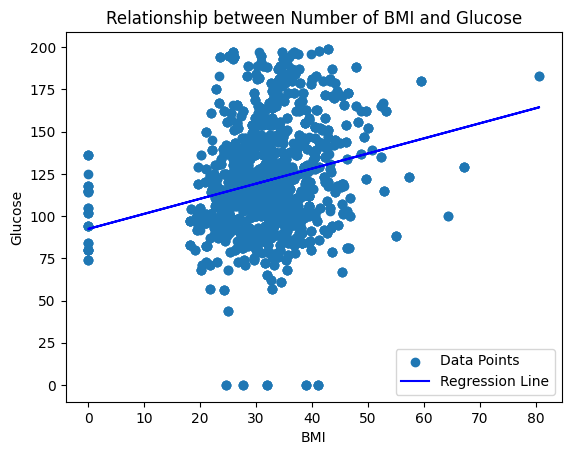

In [42]:

X = HCD['BMI']
y = HCD['Glucose']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(HCD['BMI'], HCD['Glucose'], label='Data Points')
plt.plot(HCD['BMI'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Relationship between Number of BMI and Glucose')
plt.legend()
plt.show()

## Results:
The Null Hypothesis is correct because after viewing the regression plot diagram it is clear that the results are not linear and there is no correlaion between a persons BMI asnd Glucose level.

I used Regression for this hypothesis because the hypothesis requires two numerical variables.